# Exercise 8: Bootstrap

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import uniform

## 1. Exercise 13 in Chapter 8 of Ross (P.152).
### (a)

Since $\mu$ is unknown, we estimate it by taking the mean of the original sample.

Then, for each bootstrap sample we compute the difference between the sample mean and $\mu$.

The probability $p$ can then be estimated as the proportion of these differences that fall outside the interval $(a, b)$.

### (b)

In [6]:
xi = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
n = 10
a = -5
b = 5

n_bootstrap = 10_000

np.random.seed(42)
bootstrap_samples = np.random.choice(xi, size=(n_bootstrap, 10))

mu = np.mean(xi)

bootstrap = np.sum(bootstrap_samples / n, axis=1) - mu
p = np.mean(np.abs(bootstrap) < 5)
print(f"{p = :.3f}")

p = 0.767


From this, we obtain the bootstrap estimate $p = 0.767$.

## 2. Exercise 15 in Chapter 8 of Ross (P.152).

We want to estimate the variance $\sigma^2$ of the samples $X_i$, by the sample variance $S^2 = \sum_{i=1}^n (X_i - \bar{X}^2 / (n - 1)$.

To understand how reliable this estimate is, we use the bootstrap technique to calculate $Var(S^2)$.

In [15]:
# seed for reproducability
np.random.seed(42)

# data given in the exercise
data = np.array([5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8])

# draw 10,000 bootstrap samples, each of size 15 (original sample size)
n = data.shape[0]
n_bootstrap = 10_000
bootstrap_samples = np.random.choice(data, size=(n_bootstrap, n))

# take the mean of each bootstrap sample (X bar)
x_bar = np.mean(bootstrap_samples, axis=1).reshape(-1, 1)

# calculate sample variance for each bootstrap sample
S2 = np.sum((bootstrap_samples - x_bar)**2 / (n - 1), axis=1)

# calculate the variance of the sample variances S^2
var_S2 = np.var(S2)

print(f"Var(S^2) = {var_S2:.2f}")

Var(S^2) = 59.14


From this we get the bootstrap estimate $Var(S^2) = 59.14$

### 3. Write a subroutine that takes as input a “data” vector of observed values, and which outputs the median as well as the bootstrap estimate of the variance of the median, based on r = 100 bootstrap replicates. Simulate N = 200 Pareto distributed random variates with β = 1 and k = 1.05

First, we simulate 200 samples from the pareto distribution, and draw 100 bootstrap replicates:

In [22]:
def sample_pareto(n, k, beta):
    us = uniform.rvs(size=n)
    return beta * us ** (-1/k)

np.random.seed(69)

n = 200

sample = sample_pareto(n, k=1.05, beta=1)

bootstrap_samples = np.random.choice(sample, size=(100, n))

### (a) Compute the mean and the median (of the sample)

In [23]:
sample_mean = np.mean(sample)
sample_median = np.median(sample)

print(f"Sample mean   = {sample_mean:.2f}")
print(f"Sample median = {sample_median:.2f}")

Sample mean   = 7.35
Sample median = 2.11


We get a sample mean of $7.35$, and a sample median of $2.11$.

### (b) Make the bootstrap estimate of the variance of the sample mean.

In [26]:
bs_var_of_sample_mean = np.var(np.mean(bootstrap_samples, axis=1))

print(f"Variance of sample mean (bootsrap estimate): {bs_var_of_sample_mean:.2f}")

Variance of sample mean (bootsrap estimate): 9.24


We find the bootstrap estimate of the sample mean to be $9.24$.

### (c) Make the bootstrap estimate of the variance of the sample median.


In [28]:
bs_var_of_sample_median = np.var(np.median(bootstrap_samples, axis=1))

print(f"Variance of sample median (bootsrap estimate): {bs_var_of_sample_median:.3f}")

Variance of sample median (bootsrap estimate): 0.015


We find the bootstrap estimate of the sample median to be $0.015$.

### (d) Compare the precision of the estimated median with the precision of the estimated mean.

In [30]:
std_mean = np.sqrt(bs_var_of_sample_mean)
std_median = np.sqrt(bs_var_of_sample_median)
diff_of_stds = std_mean - std_median

print(f"Difference of var(sample mean) and var(sample median): {bs_var_of_sample_mean - bs_var_of_sample_median:.3f}")
print(f"Difference of std(sample mean) and std(sample median): {diff_of_stds:.3f}")

Difference of var(sample mean) and var(sample median): 9.221
Difference of std(sample mean) and std(sample median): 2.919


The difference between the variance of the sample mean and the variance of the sample median is $9.221$.

The difference between the standard deviation of the sample mean and the standard deviation of the sample median is $2.919$.

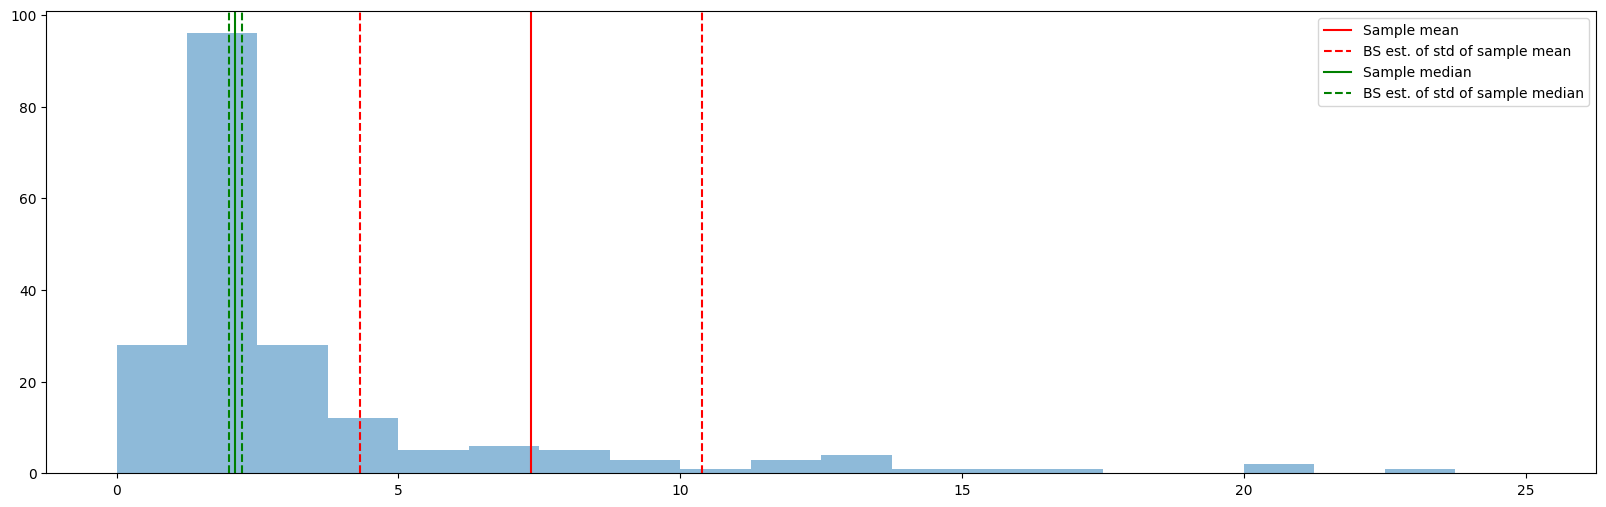

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
ax.hist(sample, range=(0, 25), bins=20, alpha=0.5)
ax.axvline(sample_mean, color="r", label="Sample mean")
ax.axvline(sample_mean + std_mean, color="r", linestyle="--", label="BS est. of std of sample mean")
ax.axvline(sample_mean - std_mean, color="r", linestyle="--")

ax.axvline(sample_median, color="g", label="Sample median")
ax.axvline(sample_median + std_median, color="g", linestyle="--", label="BS est. of std of sample median")
ax.axvline(sample_median - std_median, color="g", linestyle="--")

ax.legend()

plt.show()

We plot the sample mean and median, along with intervals of +/- 1 their respective standard deviation.

We see that the median has a much narrower interval than the mean, which is exactly what we would expect from the pareto distribution, given how hard it is to estimate its mean (which we can assert using its first order moment distribution).